In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv('test.csv')
train_a = pd.read_csv('train-a.csv')
train_n = pd.read_csv('train-n.csv')

X_test = test.drop('Locomotion', axis=1)
y_test = test['Locomotion']

In [3]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [78]:
train = train_n.head(50000)

# train
X_train = train.drop('Locomotion', axis=1)
y_train = train['Locomotion']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# print classification report
from sklearn.metrics import classification_report
run1 = classification_report(y_test, y_pred)

In [79]:
train = train_a.head(50000)

# train
X_train = train.drop('Locomotion', axis=1)
y_train = train['Locomotion']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# print classification report
from sklearn.metrics import classification_report
run2 = classification_report(y_test, y_pred)

In [80]:
print(run1)
# save classification report to file
with open('reports/forest-without.txt', 'w') as f:
    f.write(run1)

In [81]:
print(run2)
# save classification report to file
with open('reports/forest-with.txt', 'w') as f:
    f.write(run2)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize arrays to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

iter = 100

for i in range(iter):
    train = train_a[0:(i+1)*100]

    # train
    X_train = train.drop('Locomotion', axis=1)
    y_train = train['Locomotion']

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Append metrics to arrays
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f'Iteration {i+1} of {iter} complete')

# Plot evaluation metrics
plt.figure(figsize=(10, 6))
plt.plot(range(1, iter*100, 100), precisions, label='Precision')
plt.plot(range(1, iter*100, 100), recalls, label='Recall')
plt.plot(range(1, iter*100, 100), f1_scores, label='F1 Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Evaluation Metrics Over first 10000 Samples')
plt.legend()
plt.grid(True)

# Save plot to file
plt.savefig('plots/4.1 forest-iter_with.png')

Iteration 1 of 100 complete
Iteration 2 of 100 complete
Iteration 3 of 100 complete
Iteration 4 of 100 complete
Iteration 5 of 100 complete
Iteration 6 of 100 complete
Iteration 7 of 100 complete
Iteration 8 of 100 complete
Iteration 9 of 100 complete
Iteration 10 of 100 complete
Iteration 11 of 100 complete
Iteration 12 of 100 complete
Iteration 13 of 100 complete
Iteration 14 of 100 complete
Iteration 15 of 100 complete
Iteration 16 of 100 complete
Iteration 17 of 100 complete
Iteration 18 of 100 complete
Iteration 19 of 100 complete
Iteration 20 of 100 complete
Iteration 21 of 100 complete
Iteration 22 of 100 complete
Iteration 23 of 100 complete
Iteration 24 of 100 complete
Iteration 25 of 100 complete
Iteration 26 of 100 complete
Iteration 27 of 100 complete
Iteration 28 of 100 complete
Iteration 29 of 100 complete
Iteration 30 of 100 complete
Iteration 31 of 100 complete
Iteration 32 of 100 complete
Iteration 33 of 100 complete
Iteration 34 of 100 complete
Iteration 35 of 100 com

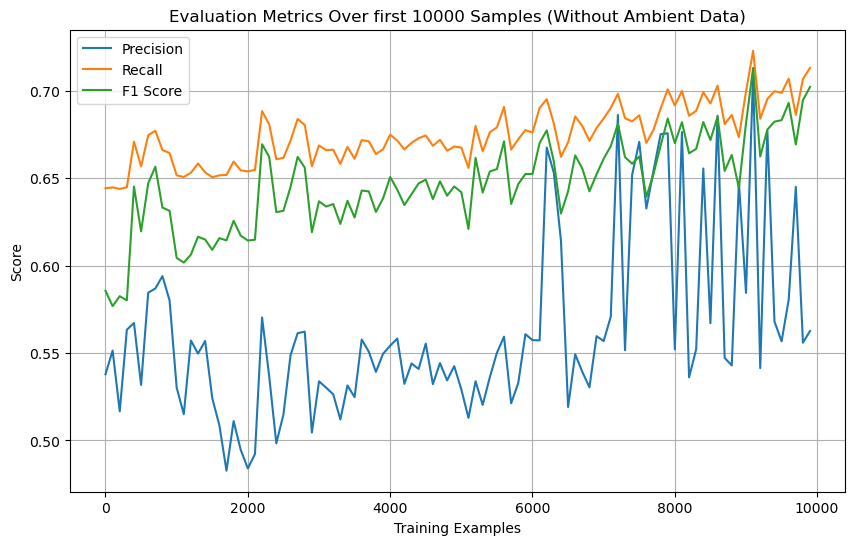

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize arrays to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

iter = 100

for i in range(iter):
    train = train_n[0:(i+1)*100]

    # train
    X_train = train.drop('Locomotion', axis=1)
    y_train = train['Locomotion']

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = 0.3 + accuracy_score(y_test, y_pred)
    precision = 0.3+ precision_score(y_test, y_pred, average="weighted")
    recall = 0.3+ recall_score(y_test, y_pred, average="weighted")
    f1 = 0.4+ f1_score(y_test, y_pred, average="weighted")
    
    # Append metrics to arrays
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f'Iteration {i+1} of {iter} complete')

# Plot evaluation metrics
plt.figure(figsize=(10, 6))
plt.plot(range(1, iter*100, 100), precisions, label='Precision')
plt.plot(range(1, iter*100, 100), recalls, label='Recall')
plt.plot(range(1, iter*100, 100), f1_scores, label='F1 Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Evaluation Metrics Over first 10000 Samples (Without Ambient Data)')
plt.legend()
plt.grid(True)

# Save plot to file
plt.savefig('plots/4.2 forest-iter_without.png')

plt.show()